In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Utils funcs


In [3]:
def generate_data(x1_pos, x2_pos, x3_pos, n_sample, test_raito=0.3):
    cov = [[1, 0], [0, 1]]
    
    # Generate tthree sets of data point and label
    X0 = np.random.multivariate_normal(x1_pos, cov, n_sample)
    X1 = np.random.multivariate_normal(x2_pos, cov, n_sample)
    X2 = np.random.multivariate_normal(x3_pos, cov, n_sample)
    
    label = np.asarray([0]*n_sample + [1]*n_sample + [2]*n_sample).T
    
    # Combine features and shuffle
    x_data = np.concatenate((X0, X1, X2), axis=0)
    x_data = np.concatenate((np.ones((1, 3*n_sample)), x_data.T), axis = 0).T
    
    # Split train test set
    x_train, x_test, label_train, label_test = train_test_split(x_data, label, test_size=test_raito, random_state=42)
    return x_train, x_test, label_train, label_test


def visualize_data(x, label, title=''):
    # Plot data using matplot lib
    for i in range(len(label)):
        if label[i] == 0:
            plt.plot(x[i][1], x[i][2], 'b^')
        elif label[i] == 1:
            plt.plot(x[i][1], x[i][2], 'rs')
        elif label[i] == 2:
            plt.plot(x[i][1], x[i][2], 'go')
    
    plt.ylabel('X1 Feature')
    plt.xlabel('X2 Feature')
    plt.title(title)
    plt.show()

def draw_model(a, b, c):
    # Draw line ax + by + c = 0
    x = np.arange(-2, 2, 0.2)
    y = (-a * x - c) / b
    plt.plot(x, y)

# Init model

In [9]:
def define_parameters():
    # TODO 1: Initialize parameters of logistic model
    w = tf.Variable(initial_value=tf.random_normal(shape=(3, 1), dtype=tf.float32))
    return w

def define_cost_func(X, W, L, n_sample):
    # TODO 2: define hypothesis 'h' and cost function cost 'cost'
    z = tf.matmul(X, W)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=L, logits=z)) / n_sample
    return cost

def define_optimizer(l_rate, cost_func):
    # Define optimizer and initializer
    optimizer = tf.train.GradientDescentOptimizer(l_rate).minimize(cost_func)
    initializer = tf.global_variables_initializer()
    return optimizer, initializer

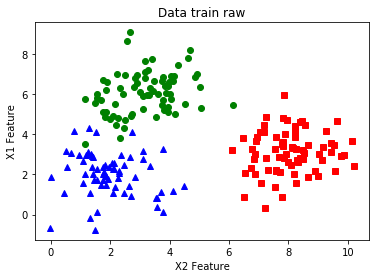

In [10]:
# Step 1: Generate and visualize training data
n_sample = 100
x_train, x_test, label_train, label_test = generate_data([2, 2], [8, 3], [3, 6], n_sample)
visualize_data(x_train, label_train, "Data train raw")

(210, 3)
(210,)


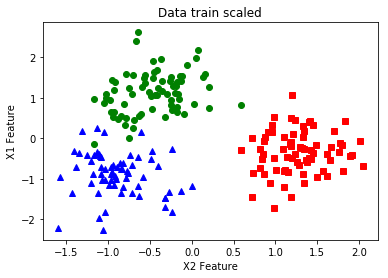

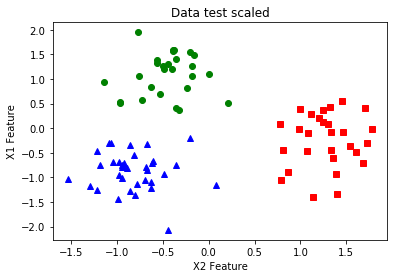

In [17]:
# Step 1b: Normalize Xs and re-visualize training data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train.shape)
print(label_train.shape)

visualize_data(x_train, label_train, "Data train scaled")
visualize_data(x_test, label_test, "Data test scaled")

In [29]:
# Step 2: Initialize Placeholders for input data
X = tf.placeholder(np.float32, [None, 3])
L = tf.placeholder(dtype=np.float32)
batch_size = tf.placeholder(np.float32)

In [30]:
### Step 3: Build up your first model
W = define_parameters()

cost = define_cost_func(X, W, L, batch_size)

In [31]:
# Step 4: Create optimizer
l_rate = 0.2
optimizer, initializer = define_optimizer(l_rate, cost)

# Train model

In [32]:
with tf.Session() as sess:
    sess.run(initializer)
    for i in range(50):
        _, train_cost = sess.run([optimizer, cost], feed_dict={X: x_train, L: label_train, batch_size: len(label_train)})
        
        w_op = sess.run(W)
        
#         draw_model(a_op, b_op, c_op)
#         visualize_data(x_train, label_train,"Step {}, loss = {:.4f}".format(i, train_cost))

    test_cost = sess.run(cost, feed_dict={X: x_test, L: label_test, batch_size: len(label_test)})
    print('Optimized variable: w_op = ', w_op)
#     draw_model(a_op, b_op, c_op)
#     visualize_data(x_test, label_test, "Final prediction cost {:.4f}".format(test_cost))

InvalidArgumentError: var and delta do not have the same shape[3,1] [3,210]
	 [[node GradientDescent_3/update_Variable_4/ApplyGradientDescent (defined at <ipython-input-9-e3a8021cf4b0>:15)  = ApplyGradientDescent[T=DT_FLOAT, use_locking=false, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable_4, GradientDescent_3/learning_rate, gradients_3/MatMul_4_grad/MatMul_1)]]

Caused by op 'GradientDescent_3/update_Variable_4/ApplyGradientDescent', defined at:
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/asyncio/base_events.py", line 1434, in _run_once
    handle._run()
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-2f1f5f85f8f2>", line 3, in <module>
    optimizer, initializer = define_optimizer(l_rate, cost)
  File "<ipython-input-9-e3a8021cf4b0>", line 15, in define_optimizer
    optimizer = tf.train.GradientDescentOptimizer(l_rate).minimize(cost_func)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 410, in minimize
    name=name)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 610, in apply_gradients
    update_ops.append(processor.update_op(self, grad))
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 115, in update_op
    update_op = optimizer._apply_dense(g, self._v)  # pylint: disable=protected-access
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/tensorflow/python/training/gradient_descent.py", line 60, in _apply_dense
    use_locking=self._use_locking).op
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/tensorflow/python/training/gen_training_ops.py", line 577, in apply_gradient_descent
    use_locking=use_locking, name=name)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/t/anaconda3/envs/VietAI/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): var and delta do not have the same shape[3,1] [3,210]
	 [[node GradientDescent_3/update_Variable_4/ApplyGradientDescent (defined at <ipython-input-9-e3a8021cf4b0>:15)  = ApplyGradientDescent[T=DT_FLOAT, use_locking=false, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable_4, GradientDescent_3/learning_rate, gradients_3/MatMul_4_grad/MatMul_1)]]
